---------------------------------DATA PREPROCESSING---------------------------------

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

import datasets.data as data
from descent_algorithms import *
from models import *
from util import *

Using TensorFlow backend.


In [2]:
features, labels = data.load_wisconsin_breast_cancer()
wbc_X_train, wbc_X_test, wbc_y_train, wbc_y_test = train_test_split(
    features, labels, test_size=0.2)
# print(features.shape)
# print(labels.shape)

# print (features[0])
# print (labels)

M_features, M_labels = data.load_MNIST_13()
MNIST_X_train, MNIST_X_test, MNIST_y_train, MNIST_y_test = train_test_split(
    M_features, M_labels, test_size = 0.2)

# print(M_features.shape)
# print(M_labels.shape)

# print (M_features[0])
# print (M_labels)

cod_features, cod_labels = data.load_cod_rna()
# print(cod_features.shape)
# print(cod_labels.shape)

# print(cod_features[0])
# print(cod_labels)

cod_X_train, cod_X_test, cod_y_train, cod_y_test = train_test_split(
    cod_features, cod_labels, test_size = 0.2)

In [3]:
rel_conv = 0.000001

In [4]:
#Learning Rate Objects
lr = FixedRate(0.001)

lr1 = FixedRate(0.00001)

lr2 = FixedRate(0.0001)

In [5]:
#Descent Algorithm Objects
gd = GradientDescent()
gd1 = GradientDescent()
gd2 = GradientDescent()
# gd = StochasticVarianceReducedGradientDescent()
# gd = NesterovAcceleratedDescent()

In [6]:
#Models(descent_algo, learning rate, iterations, batch, relative convergence)
logreg = LogisticRegression(gd, lr, 25000, wbc_X_train.shape[0], rel_conv)

cod_logreg = LogisticRegression(gd1, lr1, 25000, cod_X_train.shape[0], rel_conv)

MNIST_logreg = LogisticRegression(gd2, lr2, 2500, MNIST_X_train.shape[0], rel_conv)


#Models(descent_algo, learning rate, iterations, batch, relative convergence)
# logreg = LogisticRegression(gd, lr, 16000, wbc_X_train.shape[0], rel_conv)

In [7]:
loss = logreg.fit(wbc_X_train, wbc_y_train)

loss_cod = cod_logreg.fit(cod_X_train, cod_y_train)

loss_MNIST = MNIST_logreg.fit(MNIST_X_train, MNIST_y_train)

Iter:        0 train loss: 385.455
Iter:     1250 train loss: 265.970
Iter:     2500 train loss: 242.535
Iter:     3750 train loss: 232.572
Iter:     5000 train loss: 227.226
Iter:     6250 train loss: 223.995
Iter:     7500 train loss: 221.893
Iter:     8750 train loss: 220.456
Iter:    10000 train loss: 219.436
Iter:    11250 train loss: 218.690
Iter:    12500 train loss: 218.132
Iter:    13750 train loss: 217.707
Iter:    15000 train loss: 217.377
Convergence in 15356 iterations
Iter:        0 train loss: 32630.531
Iter:     1250 train loss: 17459.898
Iter:     2500 train loss: 15992.397
Iter:     3750 train loss: 15572.831
Iter:     5000 train loss: 15411.665
Iter:     6250 train loss: 15340.667
Iter:     7500 train loss: 15306.877
Convergence in 7858 iterations
Iter:        0 train loss: nan


/Users/willye/Desktop/MLO_final/mlo_final_project/models.py:67: RuntimeWarning: divide by zero encountered in log
  return np.dot(-y.T, np.log(h)) - np.dot((1 - y).T,np.log(1 - h))


Iter:      125 train loss: 237.035
Iter:      250 train loss: 195.445
Iter:      375 train loss: 172.711
Iter:      500 train loss: 156.841
Iter:      625 train loss: 144.800
Iter:      750 train loss: 135.222
Iter:      875 train loss: nan
Iter:     1000 train loss: nan
Iter:     1125 train loss: nan
Iter:     1250 train loss: nan
Iter:     1375 train loss: nan
Iter:     1500 train loss: nan
Iter:     1625 train loss: nan
Iter:     1750 train loss: nan
Iter:     1875 train loss: nan
Iter:     2000 train loss: nan
Iter:     2125 train loss: nan
Iter:     2250 train loss: nan
Iter:     2375 train loss: nan


In [8]:
#modelAccuracyCheck
acc = check_accuracy(logreg, wbc_X_test, wbc_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))

acc = check_accuracy(cod_logreg, cod_X_test, cod_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))

acc = check_accuracy(MNIST_logreg, MNIST_X_test, MNIST_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))



Model Accuracy: 88.57%
Model Accuracy: 87.12%
Model Accuracy: 99.30%


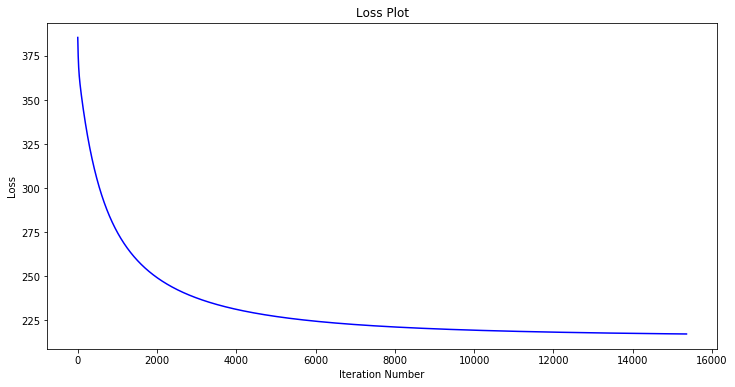

In [9]:
import matplotlib.pyplot as plt
# plt.figure(200)
# plt.title('Training Accuracy')
# plt.xlabel('Iteration x10^2')
# plt.ylabel('Accuracy')
# plt.plot(accuracies, 'b')
# plt.show()
# plt.figure(300)
# plt.title('Validation Accuracy')
# plt.xlabel('Iteration x10^2')
# plt.ylabel('Accuracy')
# plt.plot(val_accuracies, 'b')
# plt.show()
plt.figure(1, figsize=(12, 6))
plt.title('Loss Plot')
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.plot(loss, 'b')
plt.show()